In [1]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('AAPL.csv', date_parser=True)
data.head()
     

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-01,152.830002,154.979996,152.339996,152.509995,150.765762,80313700
1,2021-09-02,153.869995,154.720001,152.399994,153.649994,151.892715,71115500
2,2021-09-03,153.759995,154.630005,153.089996,154.300003,152.535294,57808700
3,2021-09-07,154.970001,157.259995,154.389999,156.690002,154.897964,82278300
4,2021-09-08,156.979996,157.039993,153.979996,155.110001,153.336029,74420200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       508 non-null    object 
 1   Open       508 non-null    float64
 2   High       508 non-null    float64
 3   Low        508 non-null    float64
 4   Close      508 non-null    float64
 5   Adj Close  508 non-null    float64
 6   Volume     508 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.9+ KB


In [4]:
data.isnull().sum()     

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,508.000000,508.000000,508.000000,508.000000,508.000000,5.080000e+02
mean,159.237185,161.126791,157.524449,159.399724,158.456352,7.883192e+07
std,16.073990,15.926515,16.187510,16.044485,16.150118,2.679507e+07
min,126.010002,127.769997,124.169998,125.019997,124.488869,3.145820e+07
25%,147.045002,148.965000,145.249997,147.100003,146.293850,5.921622e+07
50%,157.494995,159.894996,154.724998,157.384995,156.282753,7.435340e+07
75%,171.797501,173.562496,170.712498,172.174999,171.106788,9.102458e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.954327e+08


In [6]:
data.count()

Date         508
Open         508
High         508
Low          508
Close        508
Adj Close    508
Volume       508
dtype: int64

In [7]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

C:\Users\shivangi\AppData\Local\Temp\ipykernel_11488\1114244354.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  data.rolling(window=30).mean()['Close'].plot()


<AxesSubplot:>

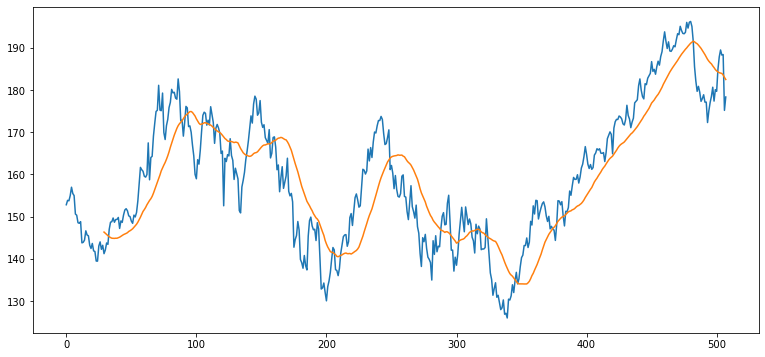

In [8]:
data['Open'].plot(figsize=(13,6)) 
data.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:>

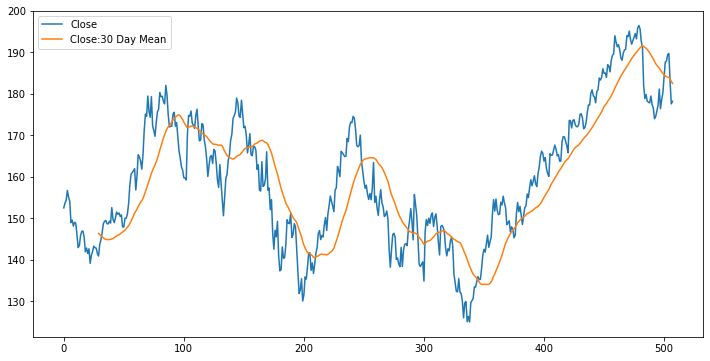

In [9]:
data['Close:30 Day Mean']=data['Close'].rolling(window=30).mean()
data[['Close','Close:30 Day Mean']].plot(figsize=(12,6))

<AxesSubplot:>

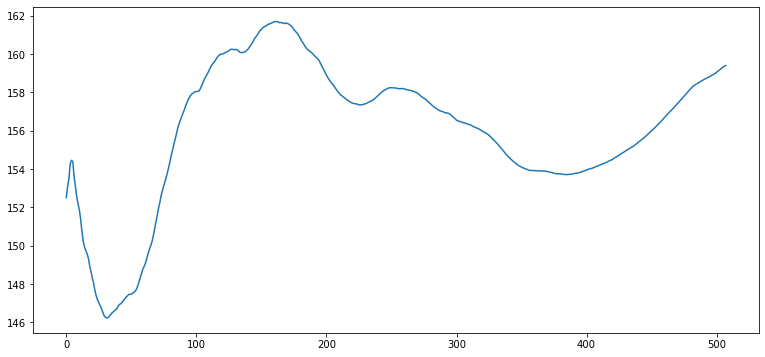

In [10]:
data['Close'].expanding(min_periods=1).mean().plot(figsize=(13,6))

In [11]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [12]:
print(scaled_data)

[[3.84852275e-01]
 [4.00811942e-01]
 [4.09911886e-01]
 [4.43371203e-01]
 [4.21251631e-01]
 [4.06692006e-01]
 [3.35293350e-01]
 [3.43413216e-01]
 [3.23393504e-01]
 [3.36133305e-01]
 [3.32773289e-01]
 [2.94554123e-01]
 [2.50875052e-01]
 [2.57734789e-01]
 [2.91614294e-01]
 [3.05333963e-01]
 [3.06593882e-01]
 [2.84894274e-01]
 [2.36455369e-01]
 [2.49335083e-01]
 [2.30715428e-01]
 [2.46815022e-01]
 [1.97676074e-01]
 [2.25255551e-01]
 [2.37715288e-01]
 [2.55774829e-01]
 [2.50314952e-01]
 [2.49055033e-01]
 [2.30855355e-01]
 [2.22455649e-01]
 [2.62354725e-01]
 [2.77474437e-01]
 [3.01414056e-01]
 [3.32353325e-01]
 [3.39353185e-01]
 [3.42433137e-01]
 [3.31373443e-01]
 [3.30673415e-01]
 [3.40193336e-01]
 [3.33613454e-01]
 [3.85692426e-01]
 [3.46913146e-01]
 [3.35153437e-01]
 [3.49993098e-01]
 [3.70572701e-01]
 [3.63152877e-01]
 [3.67632675e-01]
 [3.55872953e-01]
 [3.61052793e-01]
 [3.20593602e-01]
 [3.19893574e-01]
 [3.49573121e-01]
 [3.49713048e-01]
 [3.63712768e-01]
 [3.98572141e-01]
 [4.598907

In [13]:
training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_data_len, :]
test_data = scaled_data[training_data_len:, :]

In [14]:
training_data_len

406

In [15]:
train_data

array([[3.84852275e-01],
       [4.00811942e-01],
       [4.09911886e-01],
       [4.43371203e-01],
       [4.21251631e-01],
       [4.06692006e-01],
       [3.35293350e-01],
       [3.43413216e-01],
       [3.23393504e-01],
       [3.36133305e-01],
       [3.32773289e-01],
       [2.94554123e-01],
       [2.50875052e-01],
       [2.57734789e-01],
       [2.91614294e-01],
       [3.05333963e-01],
       [3.06593882e-01],
       [2.84894274e-01],
       [2.36455369e-01],
       [2.49335083e-01],
       [2.30715428e-01],
       [2.46815022e-01],
       [1.97676074e-01],
       [2.25255551e-01],
       [2.37715288e-01],
       [2.55774829e-01],
       [2.50314952e-01],
       [2.49055033e-01],
       [2.30855355e-01],
       [2.22455649e-01],
       [2.62354725e-01],
       [2.77474437e-01],
       [3.01414056e-01],
       [3.32353325e-01],
       [3.39353185e-01],
       [3.42433137e-01],
       [3.31373443e-01],
       [3.30673415e-01],
       [3.40193336e-01],
       [3.33613454e-01],


In [16]:
test_data

array([[0.56264889],
       [0.56292873],
       [0.58028845],
       [0.59652818],
       [0.5828083 ],
       [0.5599889 ],
       [0.56432878],
       [0.54248925],
       [0.54234913],
       [0.60744795],
       [0.62522744],
       [0.62396751],
       [0.60926776],
       [0.59400812],
       [0.57076853],
       [0.67968655],
       [0.67870647],
       [0.65448701],
       [0.67954642],
       [0.6822064 ],
       [0.66568683],
       [0.65868697],
       [0.65868697],
       [0.66736672],
       [0.70040608],
       [0.70194606],
       [0.68850623],
       [0.65154698],
       [0.65546688],
       [0.67156668],
       [0.70572583],
       [0.73190545],
       [0.73120542],
       [0.77096457],
       [0.78300434],
       [0.76382479],
       [0.75864497],
       [0.73918536],
       [0.77768459],
       [0.78314448],
       [0.82276349],
       [0.81604369],
       [0.8250035 ],
       [0.8538429 ],
       [0.83858324],
       [0.83984318],
       [0.82514364],
       [0.867

In [17]:
training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_data_len, :]
test_data = scaled_data[training_data_len:, :]

In [18]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [19]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [20]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=2)

345/345 - 29s - loss: 0.0160 - 29s/epoch - 85ms/step


In [22]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 4s 114ms/step


In [23]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

ValueError: Length of values (41) does not match length of index (102)